In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 42

setup_random_seed(RANDOM_SEED)

/opt/conda/lib/python3.6/site-packages/sweetviz/config.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  the_open = pkg_resources.open_text("sweetviz", 'sweetviz_defaults.ini')


In [2]:
df = pd.read_csv('data/01_raw/CatData/diamonds2/diamonds_dataset.csv')

                                             |          | [  0%]   00:00 -> (? left)


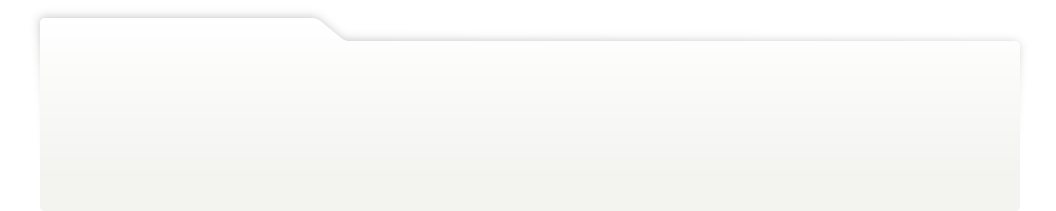
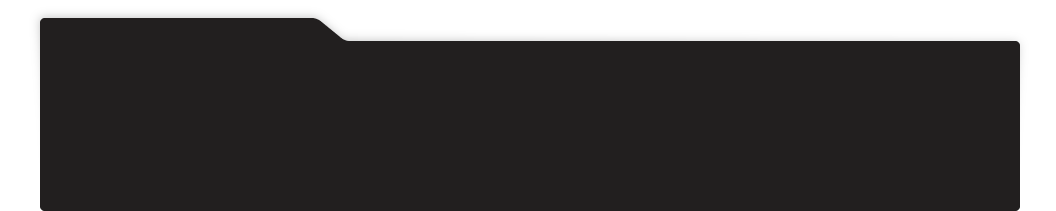
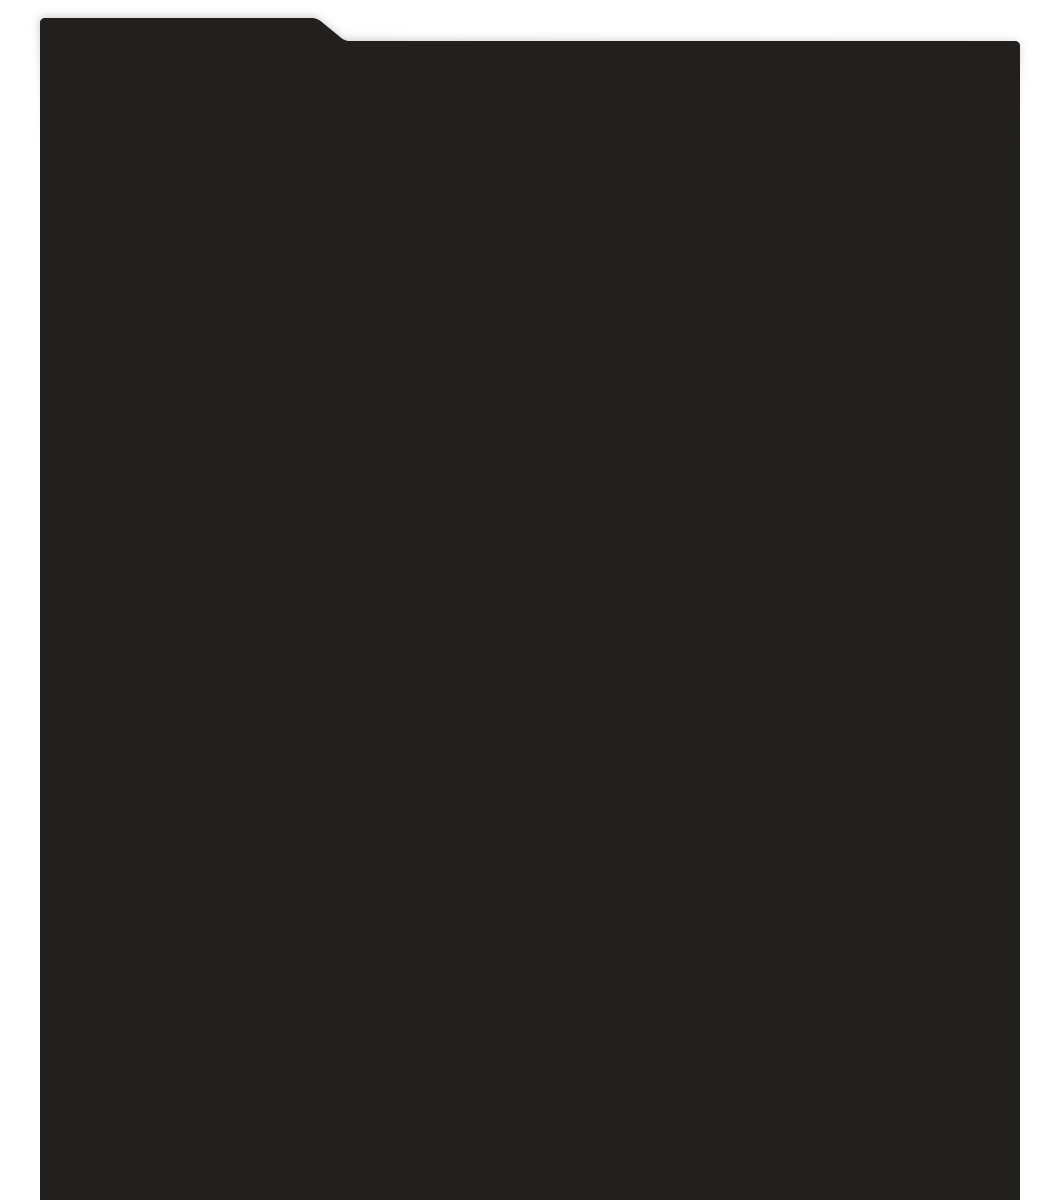
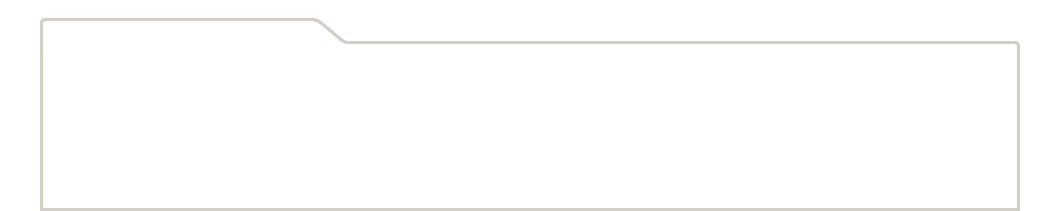
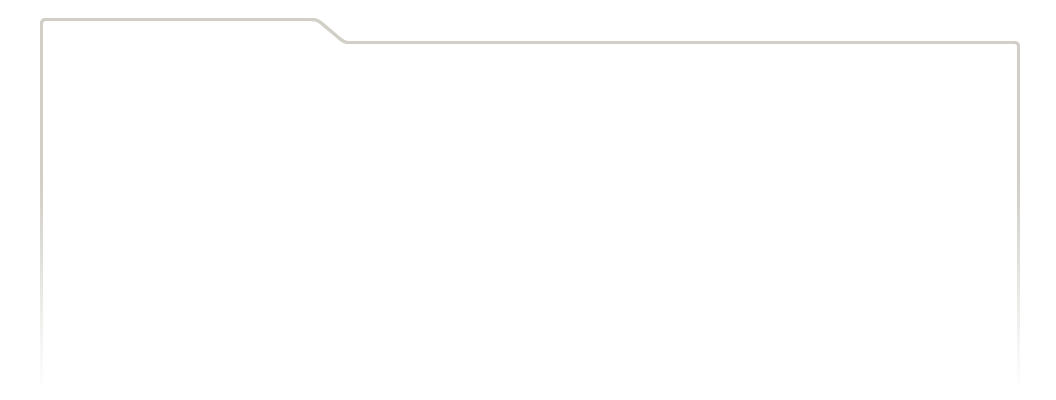
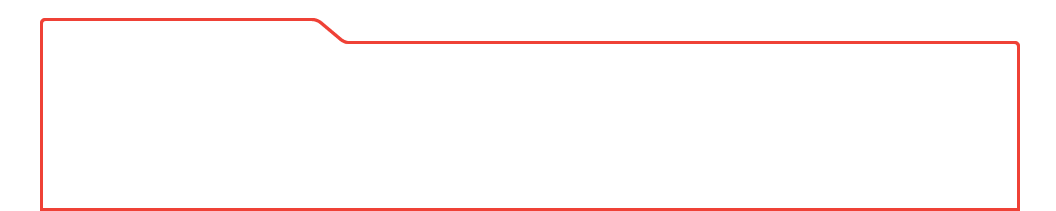
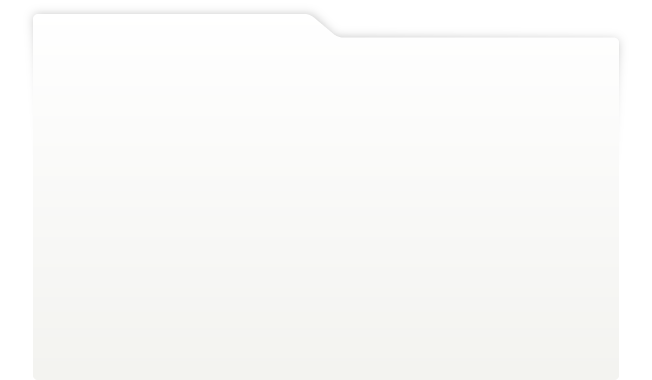
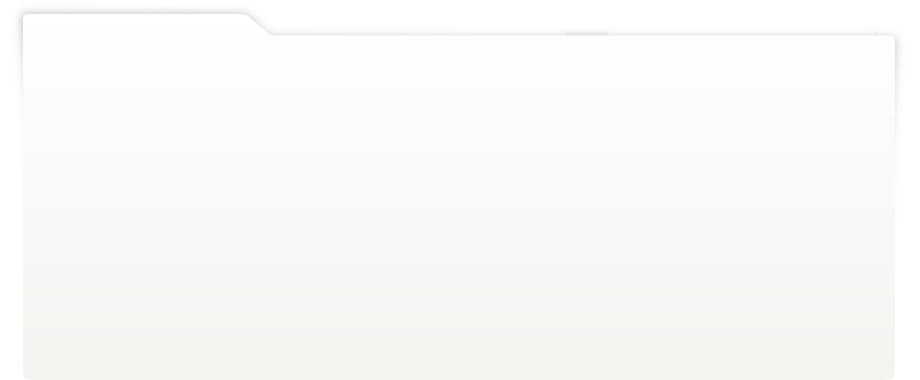
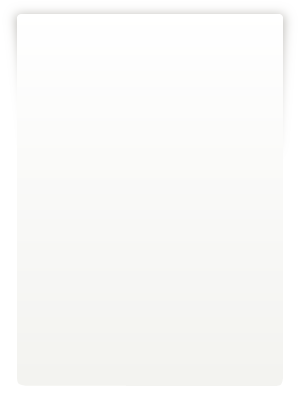
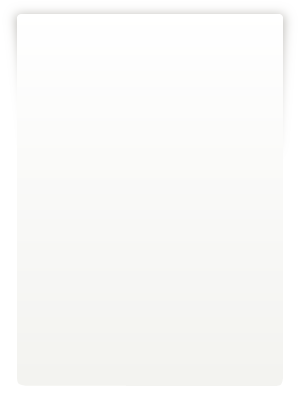
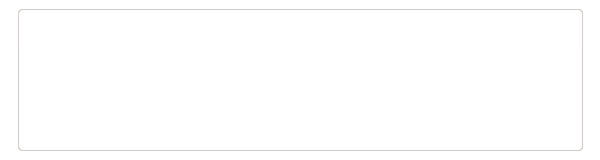
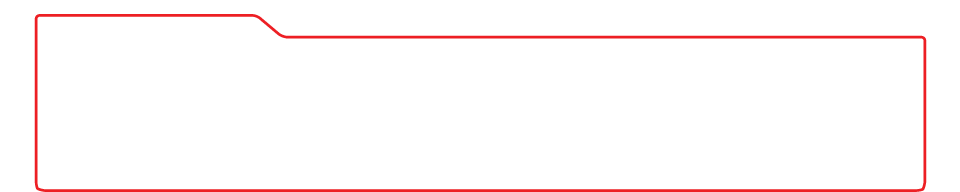
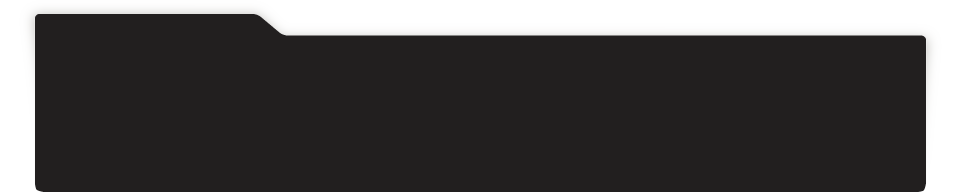
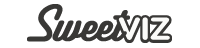
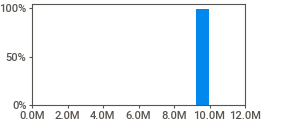
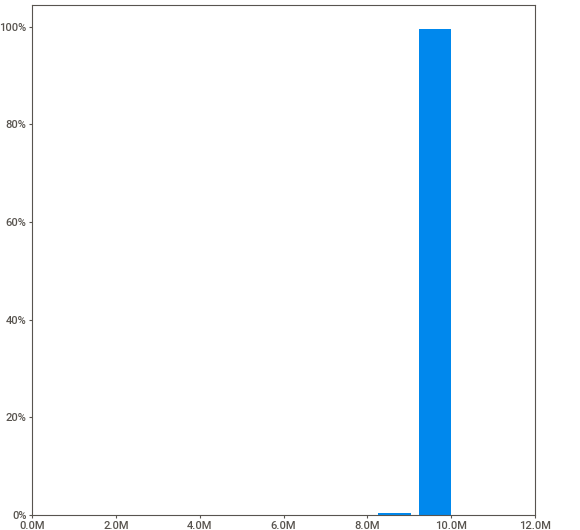
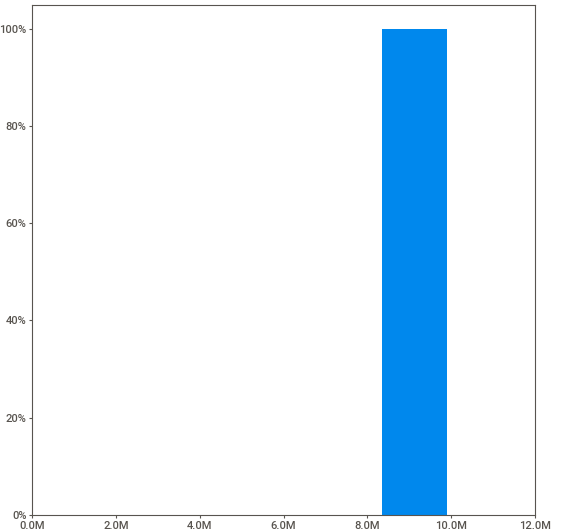
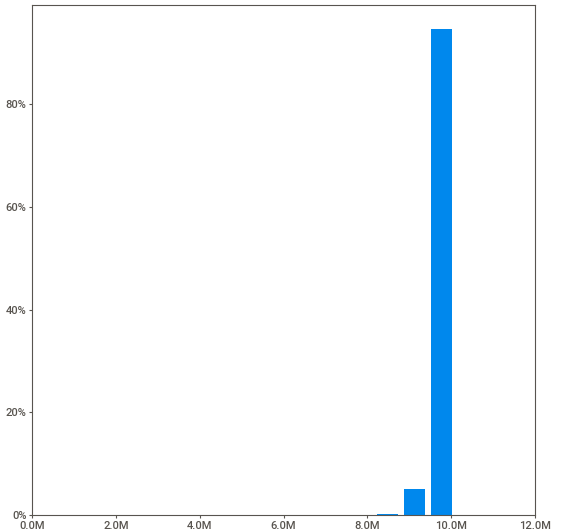
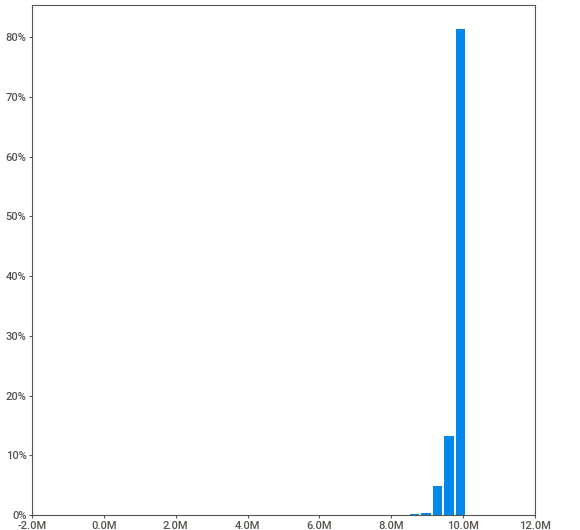
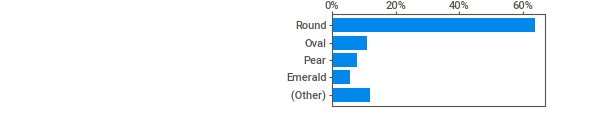
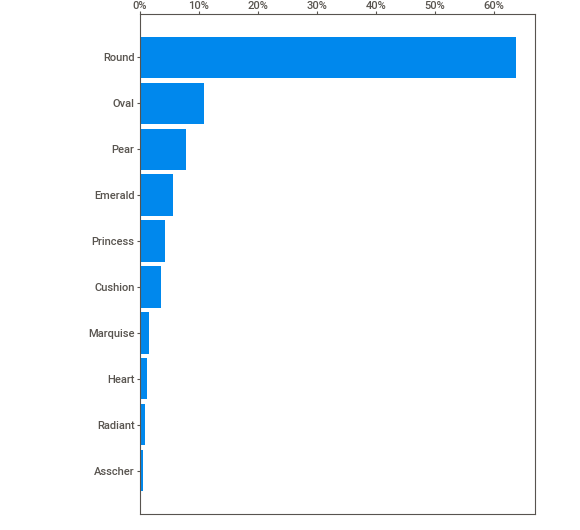
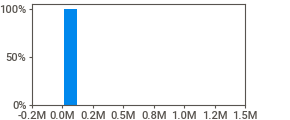
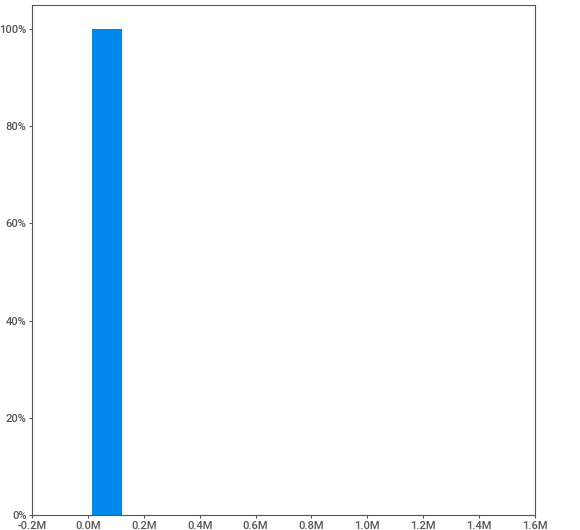
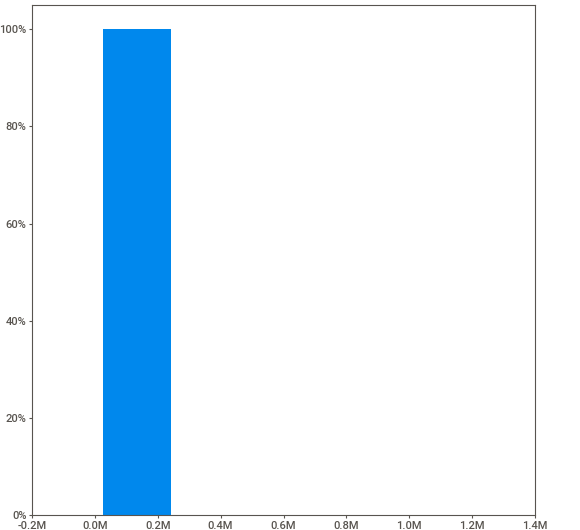
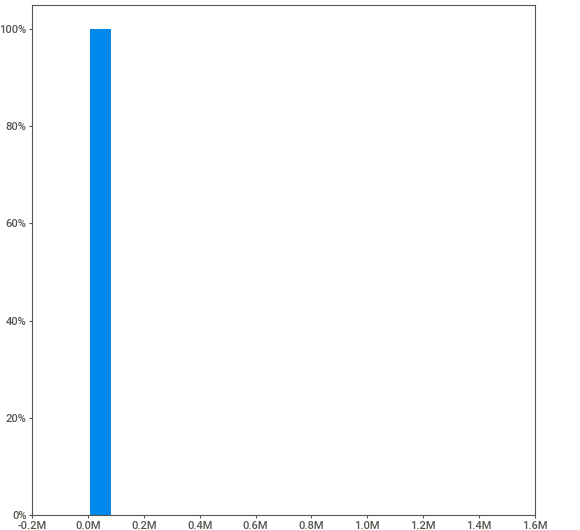
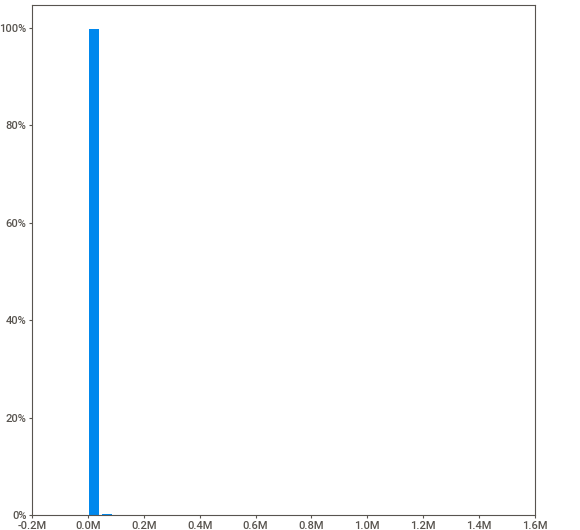
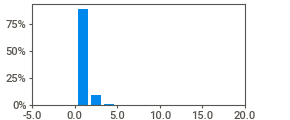
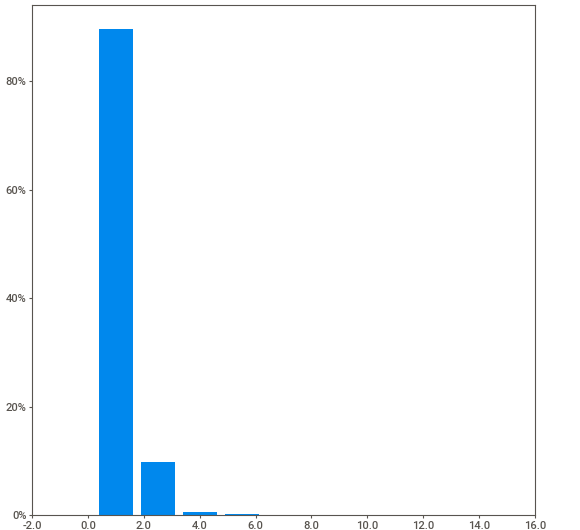
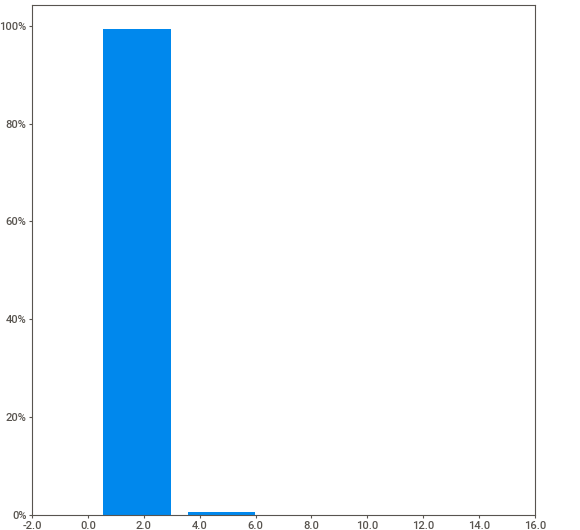
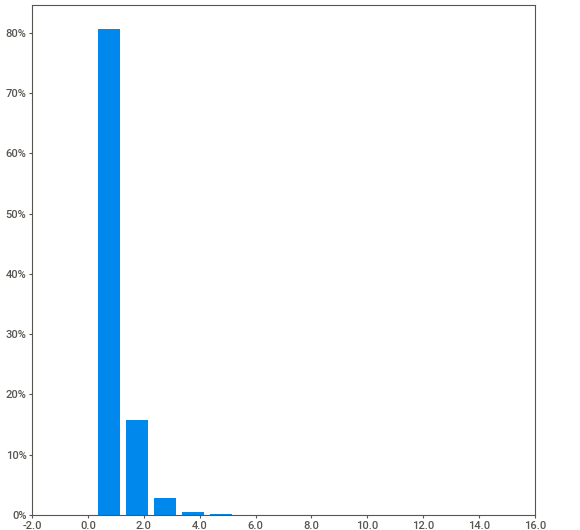
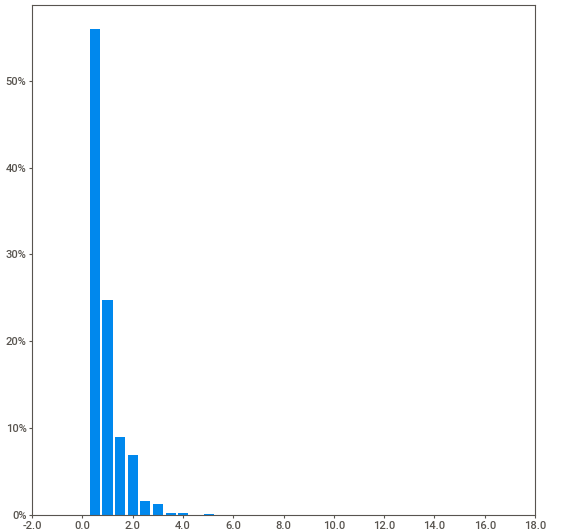
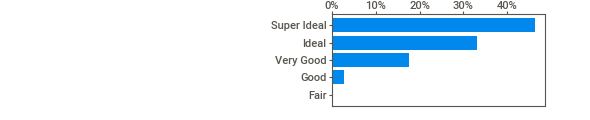
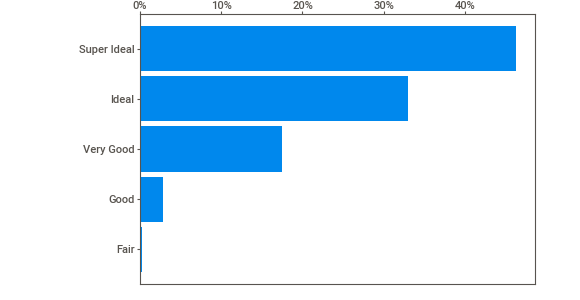
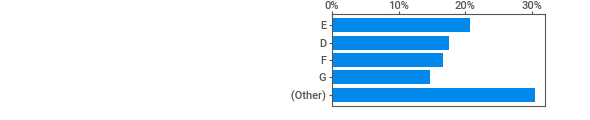
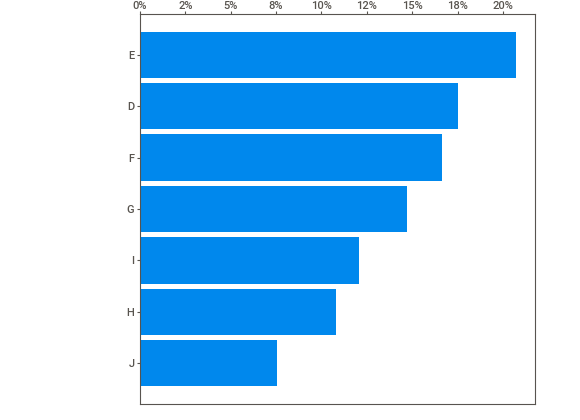
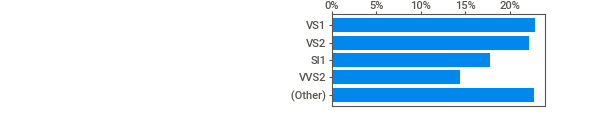
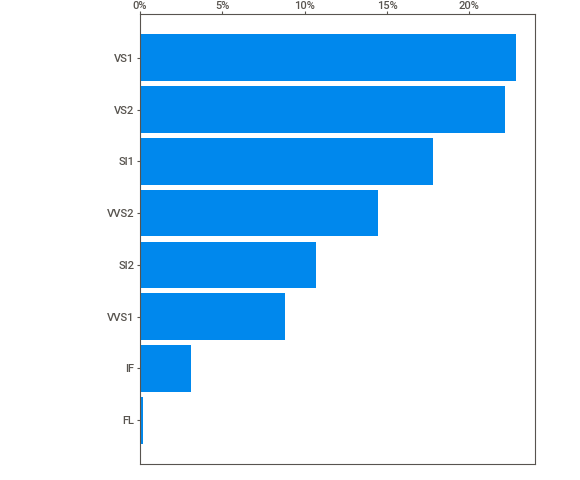
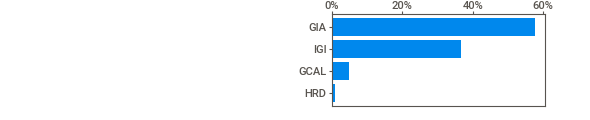
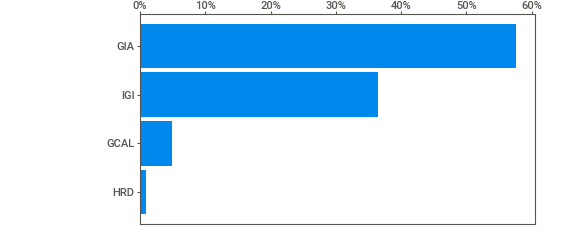
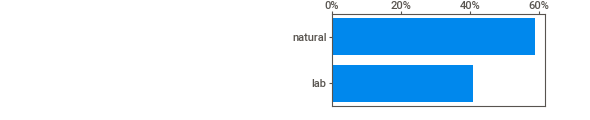
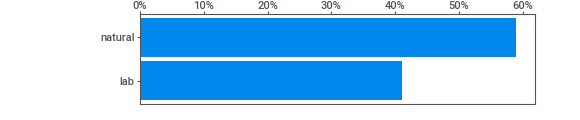
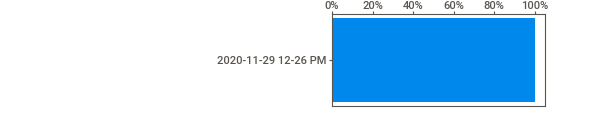
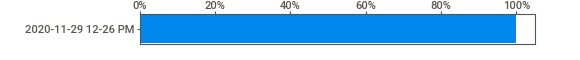
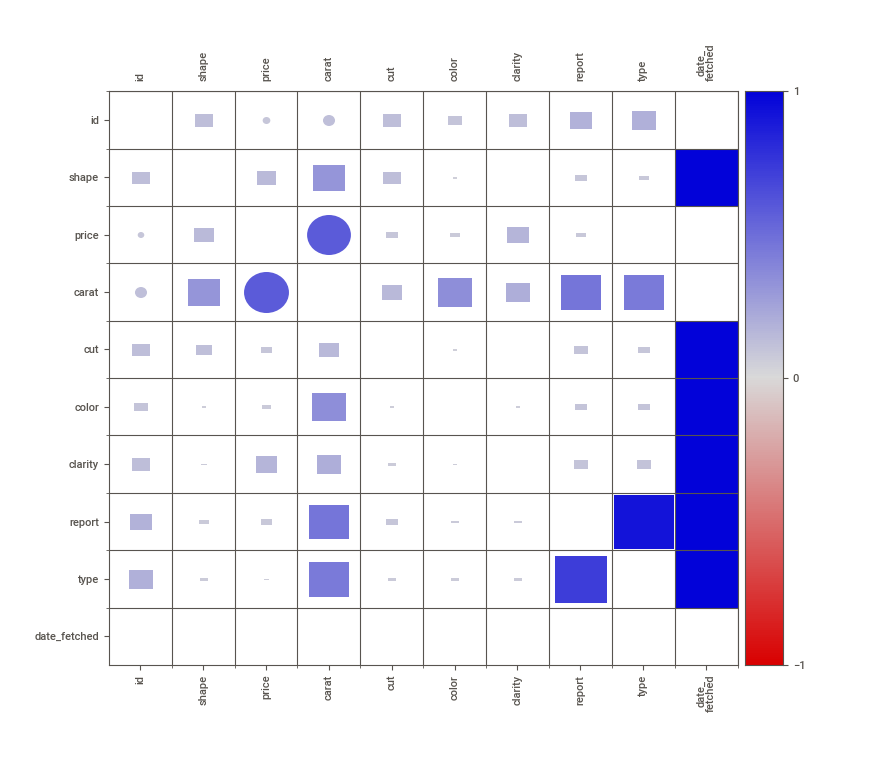
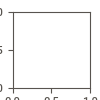

In [3]:
analysis = sweetviz.analyze(df)
analysis.show_notebook()

In [4]:
x = df.drop(columns = ['id', 'url', 'price', 'date_fetched'])
y = np.log10(df[['price']])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [6]:
x_train.shape, x_test.shape

((95445, 7), (23862, 7))

In [7]:
model = catboost.CatBoostRegressor(
    cat_features=['shape', 'cut', 'color', 'clarity', 'report', 'type'], 
    loss_function="RMSEWithUncertainty",
)

In [8]:
model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.4717176	test: 0.4700601	best: 0.4700601 (0)	total: 68.6ms	remaining: 1m 8s
1:	learn: 0.4265596	test: 0.4248670	best: 0.4248670 (1)	total: 88.1ms	remaining: 44s
2:	learn: 0.3907386	test: 0.3889370	best: 0.3889370 (2)	total: 108ms	remaining: 36s
3:	learn: 0.3598202	test: 0.3578624	best: 0.3578624 (3)	total: 129ms	remaining: 32.1s
4:	learn: 0.3304296	test: 0.3282721	best: 0.3282721 (4)	total: 154ms	remaining: 30.6s
5:	learn: 0.3024747	test: 0.3002214	best: 0.3002214 (5)	total: 171ms	remaining: 28.3s
6:	learn: 0.2764770	test: 0.2741020	best: 0.2741020 (6)	total: 189ms	remaining: 26.8s
7:	learn: 0.2515683	test: 0.2491446	best: 0.2491446 (7)	total: 207ms	remaining: 25.7s
8:	learn: 0.2276316	test: 0.2252571	best: 0.2252571 (8)	total: 225ms	remaining: 24.8s
9:	learn: 0.2045125	test: 0.2021024	best: 0.2021024 (9)	total: 245ms	remaining: 24.3s
10:	learn: 0.1818973	test: 0.1794979	best: 0.1794979 (10)	total: 263ms	remaining: 23.7s
11:	learn: 0.1593286	test: 0.1568669	best: 0.1568669 (

96:	learn: -1.0803204	test: -1.0780000	best: -1.0780000 (96)	total: 1.72s	remaining: 16s
97:	learn: -1.0881941	test: -1.0856817	best: -1.0856817 (97)	total: 1.74s	remaining: 16s
98:	learn: -1.0951996	test: -1.0925695	best: -1.0925695 (98)	total: 1.75s	remaining: 16s
99:	learn: -1.1053633	test: -1.1027587	best: -1.1027587 (99)	total: 1.77s	remaining: 15.9s
100:	learn: -1.1163553	test: -1.1137870	best: -1.1137870 (100)	total: 1.78s	remaining: 15.9s
101:	learn: -1.1252288	test: -1.1224988	best: -1.1224988 (101)	total: 1.8s	remaining: 15.8s
102:	learn: -1.1313791	test: -1.1285481	best: -1.1285481 (102)	total: 1.81s	remaining: 15.8s
103:	learn: -1.1374896	test: -1.1345520	best: -1.1345520 (103)	total: 1.83s	remaining: 15.8s
104:	learn: -1.1444700	test: -1.1413726	best: -1.1413726 (104)	total: 1.84s	remaining: 15.7s
105:	learn: -1.1521157	test: -1.1488124	best: -1.1488124 (105)	total: 1.86s	remaining: 15.7s
106:	learn: -1.1613373	test: -1.1578873	best: -1.1578873 (106)	total: 1.88s	remaining

197:	learn: -1.4978324	test: -1.4962377	best: -1.4962377 (197)	total: 3.18s	remaining: 12.9s
198:	learn: -1.5004839	test: -1.4988224	best: -1.4988224 (198)	total: 3.2s	remaining: 12.9s
199:	learn: -1.5026871	test: -1.5010392	best: -1.5010392 (199)	total: 3.22s	remaining: 12.9s
200:	learn: -1.5028536	test: -1.5011985	best: -1.5011985 (200)	total: 3.22s	remaining: 12.8s
201:	learn: -1.5030020	test: -1.5013401	best: -1.5013401 (201)	total: 3.22s	remaining: 12.7s
202:	learn: -1.5053227	test: -1.5036239	best: -1.5036239 (202)	total: 3.24s	remaining: 12.7s
203:	learn: -1.5062108	test: -1.5045089	best: -1.5045089 (203)	total: 3.26s	remaining: 12.7s
204:	learn: -1.5100770	test: -1.5084307	best: -1.5084307 (204)	total: 3.27s	remaining: 12.7s
205:	learn: -1.5119091	test: -1.5103103	best: -1.5103103 (205)	total: 3.29s	remaining: 12.7s
206:	learn: -1.5146197	test: -1.5130106	best: -1.5130106 (206)	total: 3.3s	remaining: 12.7s
207:	learn: -1.5184422	test: -1.5168358	best: -1.5168358 (207)	total: 3.

287:	learn: -1.6082546	test: -1.6058938	best: -1.6058938 (287)	total: 4.43s	remaining: 11s
288:	learn: -1.6086701	test: -1.6061793	best: -1.6061793 (288)	total: 4.44s	remaining: 10.9s
289:	learn: -1.6105971	test: -1.6079920	best: -1.6079920 (289)	total: 4.46s	remaining: 10.9s
290:	learn: -1.6118431	test: -1.6093128	best: -1.6093128 (290)	total: 4.47s	remaining: 10.9s
291:	learn: -1.6130204	test: -1.6103923	best: -1.6103923 (291)	total: 4.49s	remaining: 10.9s
292:	learn: -1.6141149	test: -1.6114253	best: -1.6114253 (292)	total: 4.5s	remaining: 10.9s
293:	learn: -1.6148823	test: -1.6121228	best: -1.6121228 (293)	total: 4.52s	remaining: 10.8s
294:	learn: -1.6160728	test: -1.6131885	best: -1.6131885 (294)	total: 4.53s	remaining: 10.8s
295:	learn: -1.6163782	test: -1.6134256	best: -1.6134256 (295)	total: 4.54s	remaining: 10.8s
296:	learn: -1.6164052	test: -1.6134479	best: -1.6134479 (296)	total: 4.55s	remaining: 10.8s
297:	learn: -1.6167748	test: -1.6138070	best: -1.6138070 (297)	total: 4.5

376:	learn: -1.6678856	test: -1.6646622	best: -1.6646622 (376)	total: 5.69s	remaining: 9.4s
377:	learn: -1.6680337	test: -1.6648375	best: -1.6648375 (377)	total: 5.71s	remaining: 9.39s
378:	learn: -1.6684624	test: -1.6652969	best: -1.6652969 (378)	total: 5.72s	remaining: 9.37s
379:	learn: -1.6686547	test: -1.6654835	best: -1.6654835 (379)	total: 5.73s	remaining: 9.36s
380:	learn: -1.6687400	test: -1.6655583	best: -1.6655583 (380)	total: 5.75s	remaining: 9.34s
381:	learn: -1.6693731	test: -1.6661500	best: -1.6661500 (381)	total: 5.76s	remaining: 9.32s
382:	learn: -1.6703360	test: -1.6670419	best: -1.6670419 (382)	total: 5.78s	remaining: 9.31s
383:	learn: -1.6714318	test: -1.6682010	best: -1.6682010 (383)	total: 5.79s	remaining: 9.3s
384:	learn: -1.6717988	test: -1.6684797	best: -1.6684797 (384)	total: 5.81s	remaining: 9.28s
385:	learn: -1.6720287	test: -1.6686570	best: -1.6686570 (385)	total: 5.83s	remaining: 9.27s
386:	learn: -1.6726768	test: -1.6691872	best: -1.6691872 (386)	total: 5.

469:	learn: -1.7288285	test: -1.7226075	best: -1.7226075 (469)	total: 7.13s	remaining: 8.04s
470:	learn: -1.7293995	test: -1.7231940	best: -1.7231940 (470)	total: 7.14s	remaining: 8.02s
471:	learn: -1.7301001	test: -1.7238852	best: -1.7238852 (471)	total: 7.16s	remaining: 8.01s
472:	learn: -1.7306694	test: -1.7243989	best: -1.7243989 (472)	total: 7.17s	remaining: 7.99s
473:	learn: -1.7310638	test: -1.7247640	best: -1.7247640 (473)	total: 7.19s	remaining: 7.98s
474:	learn: -1.7318227	test: -1.7254927	best: -1.7254927 (474)	total: 7.21s	remaining: 7.96s
475:	learn: -1.7323552	test: -1.7259605	best: -1.7259605 (475)	total: 7.22s	remaining: 7.95s
476:	learn: -1.7327970	test: -1.7263929	best: -1.7263929 (476)	total: 7.23s	remaining: 7.93s
477:	learn: -1.7332698	test: -1.7268190	best: -1.7268190 (477)	total: 7.25s	remaining: 7.91s
478:	learn: -1.7340104	test: -1.7275898	best: -1.7275898 (478)	total: 7.26s	remaining: 7.9s
479:	learn: -1.7342941	test: -1.7278714	best: -1.7278714 (479)	total: 7

568:	learn: -1.7713487	test: -1.7612012	best: -1.7612012 (568)	total: 8.57s	remaining: 6.49s
569:	learn: -1.7723149	test: -1.7621332	best: -1.7621332 (569)	total: 8.59s	remaining: 6.48s
570:	learn: -1.7724420	test: -1.7621920	best: -1.7621920 (570)	total: 8.6s	remaining: 6.46s
571:	learn: -1.7726759	test: -1.7624368	best: -1.7624368 (571)	total: 8.62s	remaining: 6.45s
572:	learn: -1.7733713	test: -1.7631042	best: -1.7631042 (572)	total: 8.63s	remaining: 6.43s
573:	learn: -1.7737507	test: -1.7634360	best: -1.7634360 (573)	total: 8.65s	remaining: 6.42s
574:	learn: -1.7742159	test: -1.7638271	best: -1.7638271 (574)	total: 8.66s	remaining: 6.4s
575:	learn: -1.7746210	test: -1.7641997	best: -1.7641997 (575)	total: 8.68s	remaining: 6.39s
576:	learn: -1.7747601	test: -1.7642948	best: -1.7642948 (576)	total: 8.7s	remaining: 6.37s
577:	learn: -1.7751925	test: -1.7646606	best: -1.7646606 (577)	total: 8.71s	remaining: 6.36s
578:	learn: -1.7754124	test: -1.7648160	best: -1.7648160 (578)	total: 8.7

662:	learn: -1.8012409	test: -1.7862341	best: -1.7862341 (662)	total: 10s	remaining: 5.09s
663:	learn: -1.8014510	test: -1.7864250	best: -1.7864250 (663)	total: 10s	remaining: 5.08s
664:	learn: -1.8016911	test: -1.7865584	best: -1.7865584 (664)	total: 10.1s	remaining: 5.07s
665:	learn: -1.8019386	test: -1.7867770	best: -1.7867770 (665)	total: 10.1s	remaining: 5.05s
666:	learn: -1.8021255	test: -1.7869424	best: -1.7869424 (666)	total: 10.1s	remaining: 5.04s
667:	learn: -1.8023045	test: -1.7870573	best: -1.7870573 (667)	total: 10.1s	remaining: 5.02s
668:	learn: -1.8026187	test: -1.7873431	best: -1.7873431 (668)	total: 10.1s	remaining: 5.01s
669:	learn: -1.8028877	test: -1.7875982	best: -1.7875982 (669)	total: 10.1s	remaining: 4.99s
670:	learn: -1.8033653	test: -1.7880440	best: -1.7880440 (670)	total: 10.2s	remaining: 4.98s
671:	learn: -1.8034402	test: -1.7880722	best: -1.7880722 (671)	total: 10.2s	remaining: 4.96s
672:	learn: -1.8035893	test: -1.7882016	best: -1.7882016 (672)	total: 10.2

751:	learn: -1.8320232	test: -1.8108243	best: -1.8108243 (751)	total: 11.5s	remaining: 3.79s
752:	learn: -1.8329112	test: -1.8116588	best: -1.8116588 (752)	total: 11.5s	remaining: 3.77s
753:	learn: -1.8334652	test: -1.8120774	best: -1.8120774 (753)	total: 11.5s	remaining: 3.76s
754:	learn: -1.8343008	test: -1.8127836	best: -1.8127836 (754)	total: 11.5s	remaining: 3.75s
755:	learn: -1.8351877	test: -1.8136700	best: -1.8136700 (755)	total: 11.6s	remaining: 3.73s
756:	learn: -1.8358347	test: -1.8143203	best: -1.8143203 (756)	total: 11.6s	remaining: 3.72s
757:	learn: -1.8365506	test: -1.8149776	best: -1.8149776 (757)	total: 11.6s	remaining: 3.7s
758:	learn: -1.8375217	test: -1.8159417	best: -1.8159417 (758)	total: 11.6s	remaining: 3.69s
759:	learn: -1.8381569	test: -1.8164482	best: -1.8164482 (759)	total: 11.6s	remaining: 3.67s
760:	learn: -1.8386993	test: -1.8169679	best: -1.8169679 (760)	total: 11.6s	remaining: 3.65s
761:	learn: -1.8394004	test: -1.8176076	best: -1.8176076 (761)	total: 1

851:	learn: -1.8688676	test: -1.8405381	best: -1.8405381 (851)	total: 13.2s	remaining: 2.29s
852:	learn: -1.8691094	test: -1.8406883	best: -1.8406883 (852)	total: 13.2s	remaining: 2.27s
853:	learn: -1.8693567	test: -1.8407698	best: -1.8407698 (853)	total: 13.2s	remaining: 2.25s
854:	learn: -1.8694718	test: -1.8408517	best: -1.8408517 (854)	total: 13.2s	remaining: 2.24s
855:	learn: -1.8698132	test: -1.8410894	best: -1.8410894 (855)	total: 13.2s	remaining: 2.22s
856:	learn: -1.8700630	test: -1.8412985	best: -1.8412985 (856)	total: 13.2s	remaining: 2.21s
857:	learn: -1.8702577	test: -1.8414241	best: -1.8414241 (857)	total: 13.3s	remaining: 2.19s
858:	learn: -1.8703150	test: -1.8413617	best: -1.8414241 (857)	total: 13.3s	remaining: 2.18s
859:	learn: -1.8708890	test: -1.8418211	best: -1.8418211 (859)	total: 13.3s	remaining: 2.16s
860:	learn: -1.8709551	test: -1.8418412	best: -1.8418412 (860)	total: 13.3s	remaining: 2.15s
861:	learn: -1.8712067	test: -1.8420617	best: -1.8420617 (861)	total: 

941:	learn: -1.8875550	test: -1.8519504	best: -1.8519504 (941)	total: 14.6s	remaining: 900ms
942:	learn: -1.8877958	test: -1.8519901	best: -1.8519901 (942)	total: 14.6s	remaining: 884ms
943:	learn: -1.8879153	test: -1.8520822	best: -1.8520822 (943)	total: 14.6s	remaining: 869ms
944:	learn: -1.8882487	test: -1.8522537	best: -1.8522537 (944)	total: 14.7s	remaining: 853ms
945:	learn: -1.8885206	test: -1.8523918	best: -1.8523918 (945)	total: 14.7s	remaining: 838ms
946:	learn: -1.8886363	test: -1.8523809	best: -1.8523918 (945)	total: 14.7s	remaining: 822ms
947:	learn: -1.8887060	test: -1.8523777	best: -1.8523918 (945)	total: 14.7s	remaining: 806ms
948:	learn: -1.8888308	test: -1.8524895	best: -1.8524895 (948)	total: 14.7s	remaining: 791ms
949:	learn: -1.8888940	test: -1.8525066	best: -1.8525066 (949)	total: 14.7s	remaining: 775ms
950:	learn: -1.8889494	test: -1.8524977	best: -1.8525066 (949)	total: 14.7s	remaining: 759ms
951:	learn: -1.8891160	test: -1.8525271	best: -1.8525271 (951)	total: 

In [9]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [10]:
calculate_nll_catboost(model, x_train, y_train)

-1.893438869361727

In [11]:
calculate_nll_catboost(model, x_test, y_test)

-1.8580485262420205

In [12]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[0, 2, 3, 4, 5, 6], 
    loss_function="RMSEWithUncertainty",
    depth=4,
    num_trees=200,
    random_state=42
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(100, 100, 50), context_dim=100, num_blocks=5, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [13]:
treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=30, batch_size=2048, verbose=True)

0:	learn: 0.4784620	total: 14ms	remaining: 2.78s
1:	learn: 0.4385497	total: 26.4ms	remaining: 2.62s
2:	learn: 0.4036259	total: 37ms	remaining: 2.43s
3:	learn: 0.3734241	total: 47.4ms	remaining: 2.33s
4:	learn: 0.3485970	total: 60.2ms	remaining: 2.35s
5:	learn: 0.3222073	total: 70.9ms	remaining: 2.29s
6:	learn: 0.2973907	total: 82.6ms	remaining: 2.28s
7:	learn: 0.2735624	total: 94.4ms	remaining: 2.27s
8:	learn: 0.2510937	total: 106ms	remaining: 2.24s
9:	learn: 0.2312263	total: 116ms	remaining: 2.2s
10:	learn: 0.2094616	total: 126ms	remaining: 2.16s
11:	learn: 0.1931662	total: 136ms	remaining: 2.14s
12:	learn: 0.1759313	total: 147ms	remaining: 2.11s
13:	learn: 0.1556556	total: 157ms	remaining: 2.09s
14:	learn: 0.1352663	total: 168ms	remaining: 2.07s
15:	learn: 0.1157348	total: 180ms	remaining: 2.07s
16:	learn: 0.0962827	total: 191ms	remaining: 2.06s
17:	learn: 0.0767753	total: 203ms	remaining: 2.05s
18:	learn: 0.0581364	total: 214ms	remaining: 2.04s
19:	learn: 0.0396149	total: 225ms	rema

164:	learn: -1.2626768	total: 1.63s	remaining: 346ms
165:	learn: -1.2655358	total: 1.64s	remaining: 337ms
166:	learn: -1.2679176	total: 1.66s	remaining: 327ms
167:	learn: -1.2702196	total: 1.66s	remaining: 317ms
168:	learn: -1.2715055	total: 1.67s	remaining: 307ms
169:	learn: -1.2739870	total: 1.68s	remaining: 297ms
170:	learn: -1.2766103	total: 1.69s	remaining: 287ms
171:	learn: -1.2783457	total: 1.7s	remaining: 277ms
172:	learn: -1.2803588	total: 1.71s	remaining: 267ms
173:	learn: -1.2822558	total: 1.72s	remaining: 257ms
174:	learn: -1.2841328	total: 1.73s	remaining: 247ms
175:	learn: -1.2867483	total: 1.74s	remaining: 237ms
176:	learn: -1.2898462	total: 1.75s	remaining: 227ms
177:	learn: -1.2920728	total: 1.76s	remaining: 218ms
178:	learn: -1.2942733	total: 1.77s	remaining: 208ms
179:	learn: -1.2960961	total: 1.78s	remaining: 198ms
180:	learn: -1.3026457	total: 1.79s	remaining: 188ms
181:	learn: -1.3041707	total: 1.8s	remaining: 178ms
182:	learn: -1.3055838	total: 1.81s	remaining: 1

TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7fe9dfe50e10>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7fe9dfe50d68>)

In [14]:
calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

-2.0990148

In [15]:
calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

-2.140414

In [16]:
data = x_test.iloc[:10, :]

In [17]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

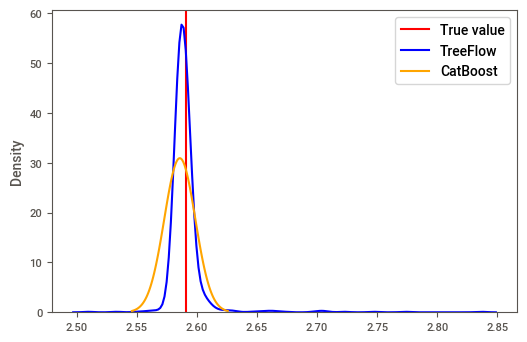

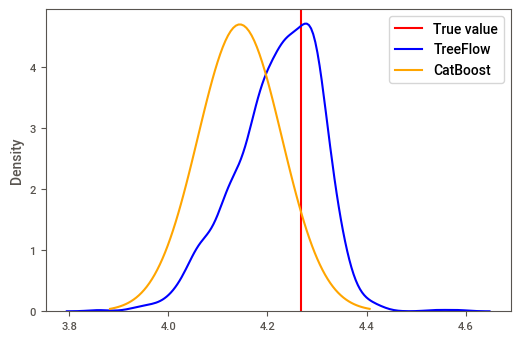

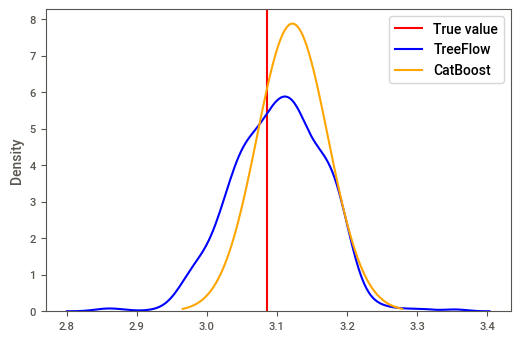

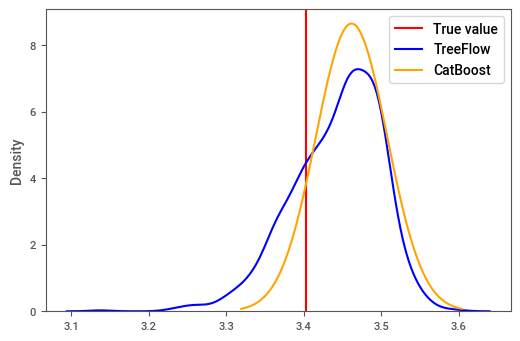

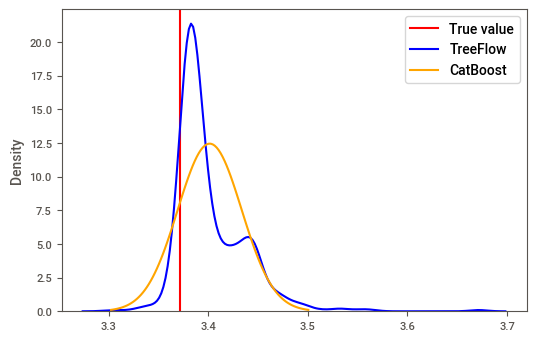

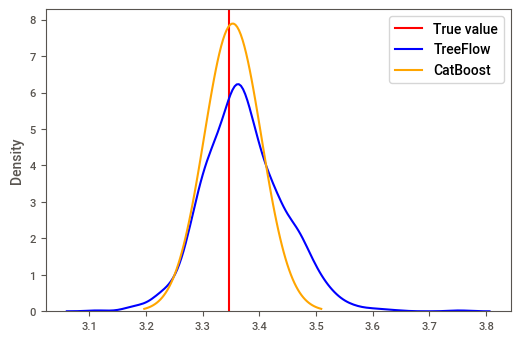

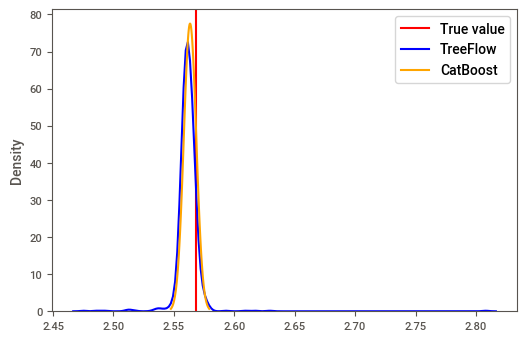

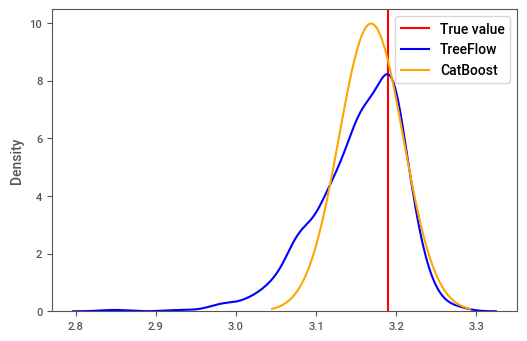

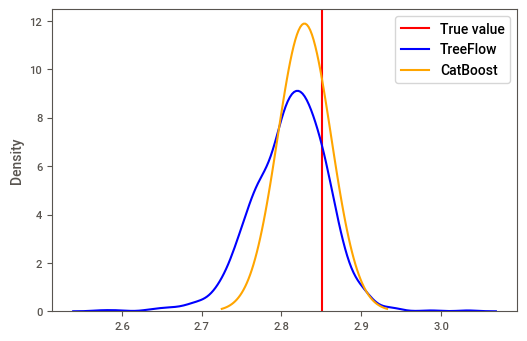

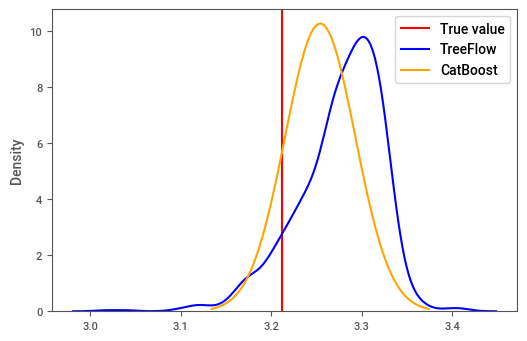

In [18]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()